# Bangalore apartment price predictor

In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [5]:
#importing data csv file
df=pd.read_csv(r'C:\Users\Chethan\Data analysis\Bangalore price\Bengaluru_House_Data.xls')

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.shape

(13320, 9)

*Checking for null values*

In [9]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

**Top 10 Societies**

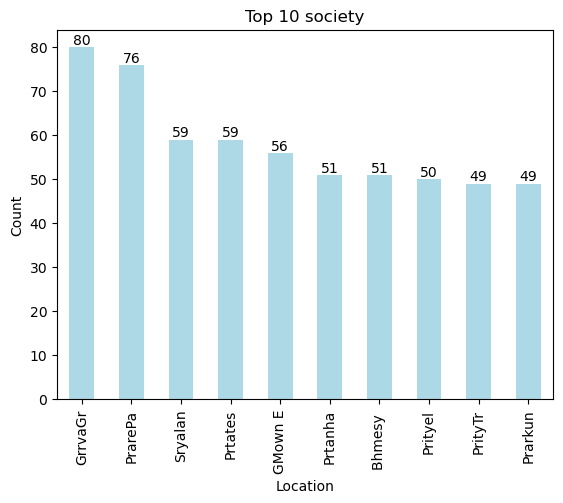

In [10]:
s=df['society'].value_counts().nlargest(10).plot(kind='bar',color='lightblue')

for p in s.patches:
    s.annotate(str(p.get_height()),(p.get_x() +p.get_width()/2,p.get_height()), 
               ha='center', va='bottom', color='black')
plt.title('Top 10 society')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

**Top 10 Locations**

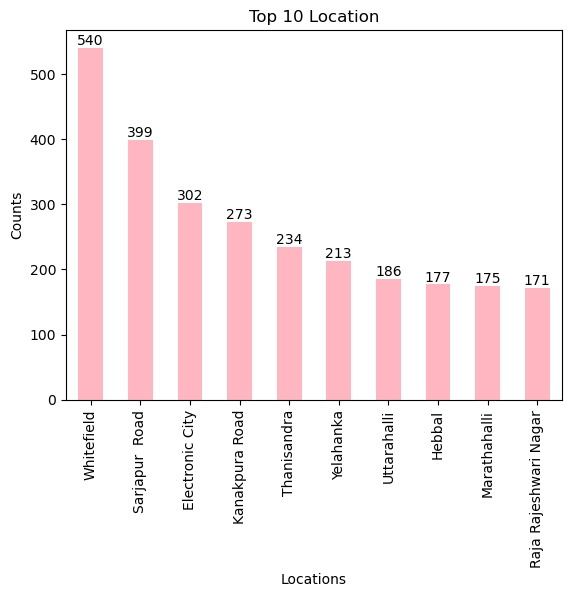

In [12]:
L=df['location'].value_counts().nlargest(10).plot(kind='bar',color='lightpink')
for i in L.patches:
    L.annotate(str(i.get_height()),(i.get_x()+i.get_width() /2, i.get_height()),ha='center',va='bottom',color='black')

plt.title('Top 10 Location')
plt.xlabel('Locations')
plt.ylabel('Counts')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [29]:
df['bath'].isna().sum()

73

 **Filling missing values in bath column using forwardfill method**

In [30]:
df['bath'].fillna(method='ffill', inplace=True)

In [31]:
df['bath'].isna().sum()

0

In [32]:
df['balcony'].isna().sum()

609

 **Filling missing values in balcony column using forwardfill method**

In [33]:
df['balcony'].fillna(method='ffill', inplace=True)

In [34]:
df['balcony'].isna().sum()

0

**droppping column society, location and availability**

In [35]:
df=df.drop(columns=['location','society','availability'])

In [36]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


**Converting total_sqft column to float**

In [40]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [41]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,size,total_sqft,bath,balcony,price
30,Super built-up Area,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,4 Bedroom,3010 - 3410,2.0,2.0,192.000
81,Built-up Area,4 Bedroom,2957 - 3450,2.0,2.0,224.500
122,Super built-up Area,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,2 BHK,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,3 BHK,1520 - 1740,2.0,1.0,74.820
410,Super built-up Area,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,2 BHK,1195 - 1440,2.0,0.0,63.770


**From the above, we can see that there are min and max value ranges, in this case we can take the average of the values**

In [42]:
def convrt_to_sngle_num(x):
    value=x.split('-')
    if len(value)==2:
        return (float(value[0])+float(value[1]))/2
    try:
        return float(x)
    except:
        return None

In [43]:
df2=df.copy()
df2['total_sqft']=df2['total_sqft'].apply(convrt_to_sngle_num)

In [46]:
df2=df2[df2.total_sqft.notnull()]

In [47]:
df2.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.0,51.00


In [49]:
df2.loc[30]

area_type     Super built-up  Area
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
Name: 30, dtype: object

In [54]:
df2.dtypes

area_type      object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

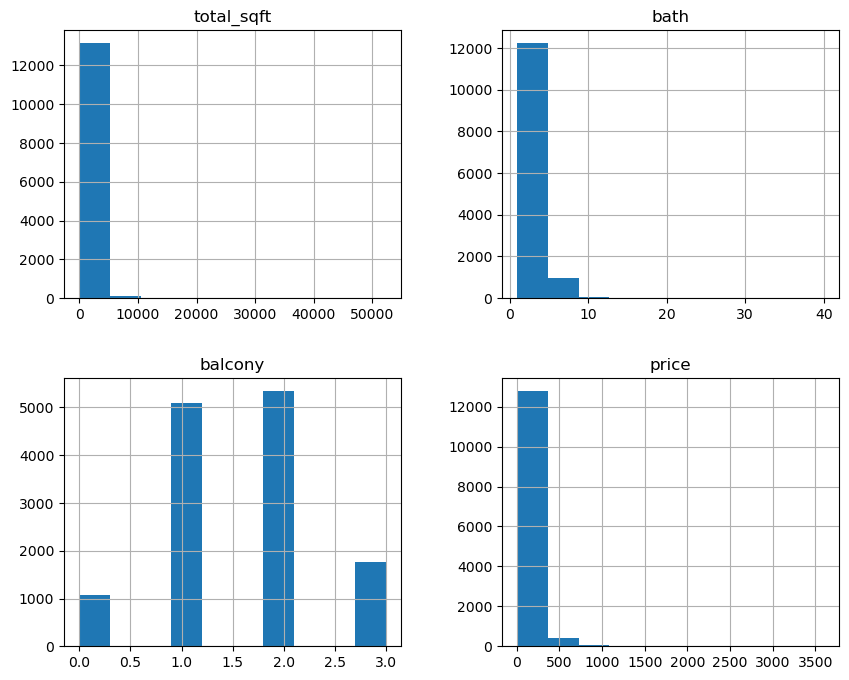

In [64]:
df2.hist(figsize=(10,8))
plt.show()

In [69]:
df2['size'].value_counts()

2 BHK         5193
3 BHK         4301
4 Bedroom      824
4 BHK          588
3 Bedroom      542
1 BHK          534
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           58
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

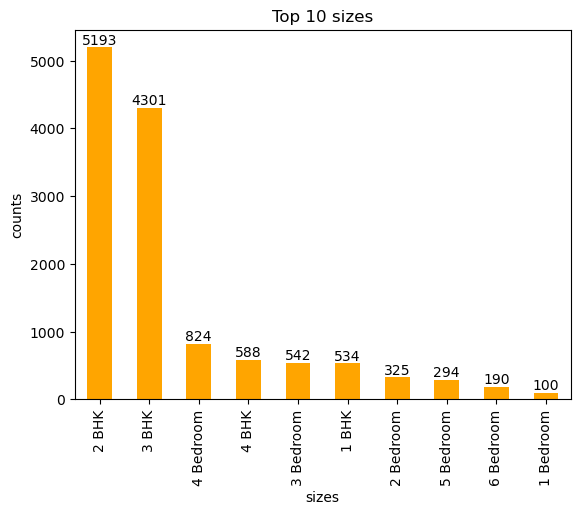

In [79]:
s=df2['size'].value_counts().nlargest(10).plot(kind='bar',color='orange')
for i in s.patches:
    s.annotate(str(i.get_height()),(i.get_x()+i.get_width()/2,i.get_height()),ha='center',va='bottom',color='black')
plt.title('Top 10 sizes')
plt.xlabel('sizes')
plt.ylabel('counts')
plt.show()

# Common area types

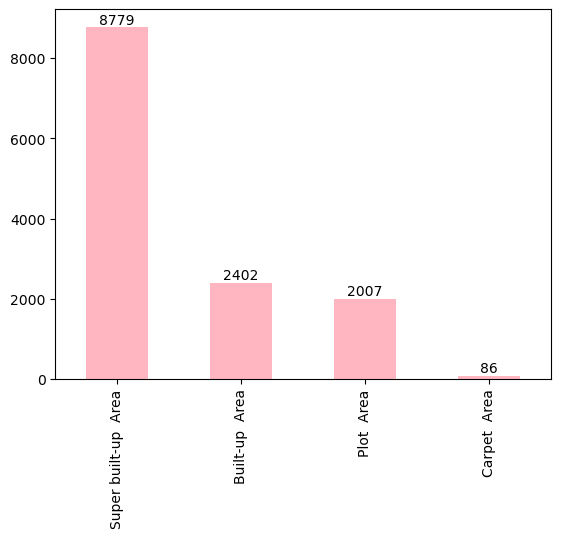

In [85]:
a=df2['area_type'].value_counts().nlargest().plot(kind='bar',color='lightpink')
for i in a.patches:
    a.annotate(str(i.get_height()),(i.get_x()+i.get_width()/2,i.get_height()),ha='center',va='bottom',color='black')

In [86]:
df2.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.0,51.00


In [88]:
df2.describe()

,total_sqft,bath,balcony,price
count,13274.000000,13274.000000,13274.000000,13274.000000
mean,1559.626694,2.690297,1.587841,112.453654
std,1238.405258,1.337321,0.818313,149.070368
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1276.000000,2.000000,2.000000,72.000000
75%,1680.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


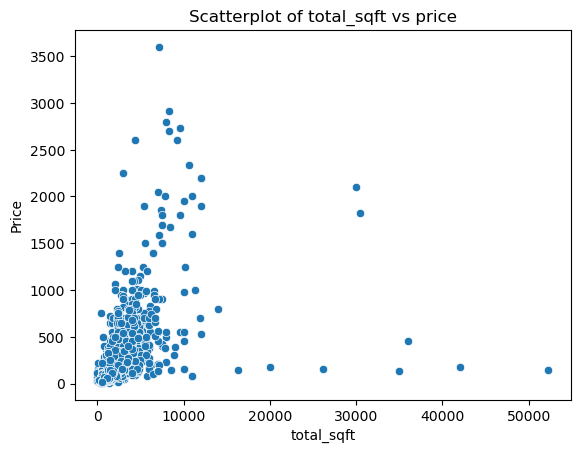

In [92]:
sns.scatterplot(x='total_sqft',y='price',data=df2)
plt.title('Scatterplot of total_sqft vs price')
plt.xlabel('total_sqft')
plt.ylabel('Price')
plt.show()

In [94]:
df2.loc[df2['total_sqft']>=10000, 'total_sqft']=np.nan

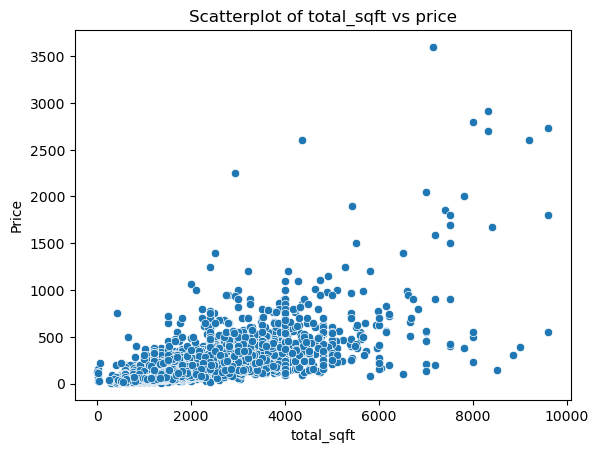

In [95]:
sns.scatterplot(x='total_sqft',y='price',data=df2)
plt.title('Scatterplot of total_sqft vs price')
plt.xlabel('total_sqft')
plt.ylabel('Price')
plt.show()

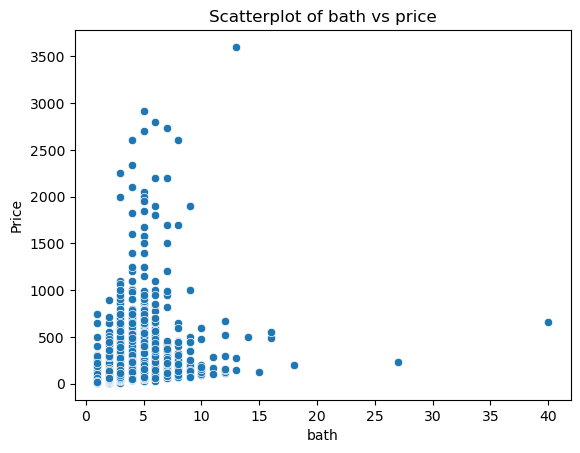

In [96]:
sns.scatterplot(x='bath',y='price',data=df2)
plt.title('Scatterplot of bath vs price')
plt.xlabel('bath')
plt.ylabel('Price')
plt.show()

In [98]:
df2.loc[df2['bath'] >=17.5,'bath']=np.nan

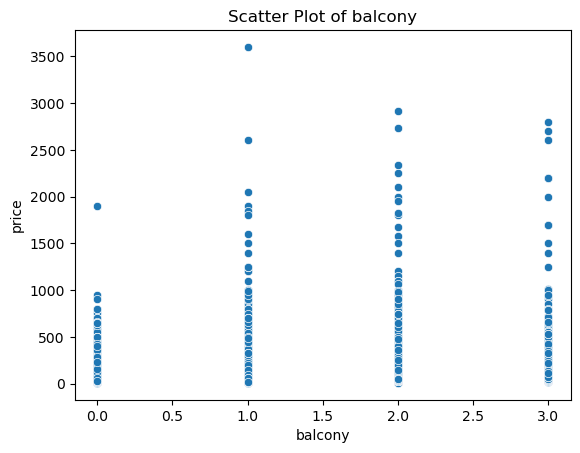

In [99]:
sns.scatterplot(x='balcony',y='price', data=df2)
plt.title('Scatter Plot of balcony')
plt.xlabel('balcony')
plt.ylabel('price')  
plt.show()

In [103]:
df2.drop(columns='area_type', inplace=True)

In [104]:
df2.drop(columns='size', inplace=True)

# Feature scale

In [105]:
df2

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00
...,...,...,...,...
13315,3453.0,4.0,0.0,231.00
13316,3600.0,5.0,0.0,400.00
13317,1141.0,2.0,1.0,60.00
13318,4689.0,4.0,1.0,488.00


In [106]:
df2.isna().sum()

total_sqft    27
bath           3
balcony        0
price          0
dtype: int64

In [135]:
df2.dropna(inplace=True)

# Normalization

In [108]:
#Adding new feature sqft_price
df2['sqft_price']=df2['total_sqft']*df2['price']

In [109]:
df2

,total_sqft,bath,balcony,price,sqft_price
0,1056.0,2.0,1.0,39.07,41257.92
1,2600.0,5.0,3.0,120.00,312000.00
2,1440.0,2.0,3.0,62.00,89280.00
3,1521.0,3.0,1.0,95.00,144495.00
4,1200.0,2.0,1.0,51.00,61200.00
...,...,...,...,...,...
13315,3453.0,4.0,0.0,231.00,797643.00
13316,3600.0,5.0,0.0,400.00,1440000.00
13317,1141.0,2.0,1.0,60.00,68460.00
13318,4689.0,4.0,1.0,488.00,2288232.00


In [159]:
scaler=MinMaxScaler()
df2_scaled=scaler.fit_transform(df2)

In [160]:
df2_scaled=pd.DataFrame(df2_scaled, columns=df2.columns)

In [161]:
df2_scaled

,total_sqft,bath,balcony,price,sqft_price
0,0.109907,0.066667,0.333333,0.008650,0.001566
1,0.270757,0.266667,1.000000,0.031180,0.011874
2,0.149911,0.066667,1.000000,0.015033,0.003395
3,0.158350,0.133333,0.333333,0.024220,0.005497
4,0.124909,0.066667,0.333333,0.011971,0.002325
...,...,...,...,...,...
13239,0.359621,0.200000,0.000000,0.062082,0.030364
13240,0.374935,0.266667,0.000000,0.109131,0.054820
13241,0.118762,0.066667,0.333333,0.014477,0.002602
13242,0.488384,0.200000,0.333333,0.133630,0.087115


In [162]:
df3=df2_scaled.copy()

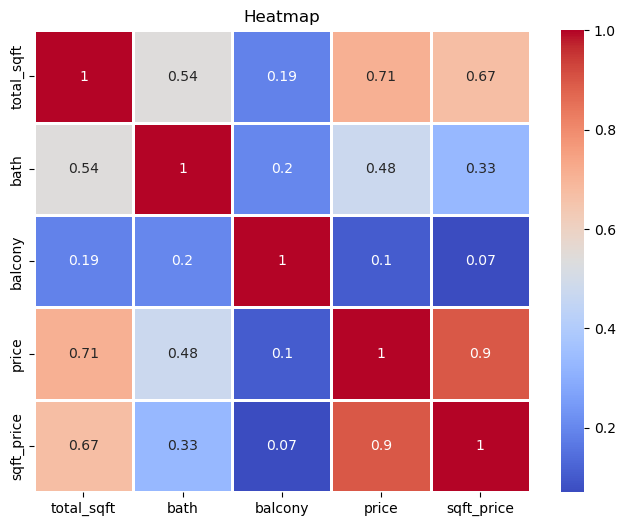

In [163]:
correlation_matrix=df3.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidth=1)
plt.title('Heatmap')
plt.show()

# Model

In [164]:
X=df3.drop(['price'], axis='columns')
y=df3.price

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=30) 

In [166]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [167]:
lr.fit(X_train,y_train)

LinearRegression()

In [168]:
lr.score(X_train,y_train)

0.8491726565080089

In [169]:
lr.score(X_test,y_test)

0.8373029928460465

In [170]:
y_pred=lr.predict(X_test)

In [171]:
y_pred

array([0.03306852, 0.04543566, 0.00834077, ..., 0.02571824, 0.0163    ,
       0.02673146])

In [172]:
result_df=pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result_df

,Actual,Predicted
0,0.031180,0.033069
1,0.025612,0.045436
2,0.007795,0.008341
3,0.024220,0.019409
4,0.018931,0.017921
...,...,...
2644,0.018653,0.019686
2645,0.035356,0.029533
2646,0.020601,0.025718
2647,0.013516,0.016300


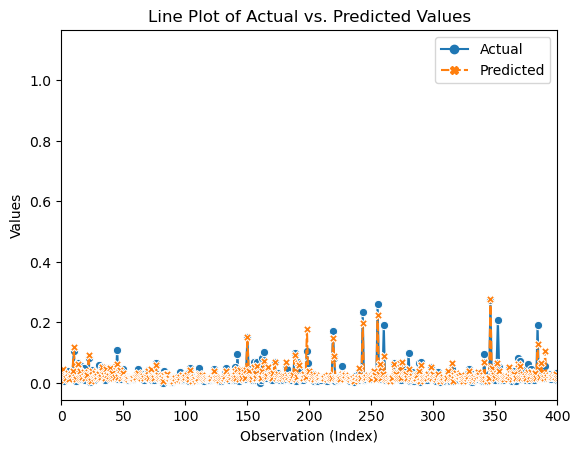

In [176]:
sns.lineplot(data=result_df, markers=True)
plt.xlabel('Observation (Index)')
plt.ylabel('Values')
plt.xlim(0,400)
plt.title('Line Plot of Actual vs. Predicted Values')
plt.show()

In [178]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=lr.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=lr.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))

Mean Absolute Error is:  0.008088096942340946
R-squared (coefficient of determination) score is : 85.09%
Accuracy for Training: 84.92%
Accuracy for Testing: 83.73%
